<a href="https://colab.research.google.com/github/kamalahmadov474/Deep-Learning/blob/main/Facial_Expression_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 – Dataset Setup

In [1]:
!pip install kaggle

# Upload kaggle.json (download it from Kaggle account settings)
from google.colab import files
files.upload()

# Move kaggle.json to the right place
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download FER2013 dataset
!kaggle datasets download -d msambare/fer2013

# Unzip
!unzip -o fer2013.zip -d fer2013_data

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: fer2013_data/train/sad/Training_65242339.jpg  
  inflating: fer2013_data/train/sad/Training_65267116.jpg  
  inflating: fer2013_data/train/sad/Training_65275626.jpg  
  inflating: fer2013_data/train/sad/Training_6529266.jpg  
  inflating: fer2013_data/train/sad/Training_65329617.jpg  
  inflating: fer2013_data/train/sad/Training_65338712.jpg  
  inflating: fer2013_data/train/sad/Training_65338797.jpg  
  inflating: fer2013_data/train/sad/Training_65387162.jpg  
  inflating: fer2013_data/train/sad/Training_65404494.jpg  
  inflating: fer2013_data/train/sad/Training_65426218.jpg  
  inflating: fer2013_data/train/sad/Training_65430136.jpg  
  inflating: fer2013_data/train/sad/Training_65437377.jpg  
  inflating: fer2013_data/train/sad/Training_6545735.jpg  
  inflating: fer2013_data/train/sad/Training_65463385.jpg  
  inflating: fer2013_data/train/sad/Training_65473985.jpg  
  inflating: fer2013_data/train/sad/Training_65502829.j

Step 2 – Imports & Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load CSV
data = pd.read_csv("fer2013.csv")

# Each image is a 48x48 grayscale
X = np.array([np.fromstring(img, sep=' ') for img in data['pixels']])
X = X.reshape(-1, 48, 48, 1) / 255.0  # normalize

y = to_categorical(data['emotion'], num_classes=7)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3 – Build CNN Model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotions
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,743 (1.36 MB)

 Trainable params: 356,295 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

Step 4 – Train Model

In [36]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64
)


Epoch 1/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8400 - loss: 0.4407 - val_accuracy: 0.6332 - val_loss: 1.2652
Epoch 2/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8432 - loss: 0.4366 - val_accuracy: 0.6314 - val_loss: 1.3281
Epoch 3/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8403 - loss: 0.4438 - val_accuracy: 0.6237 - val_loss: 1.2982
Epoch 4/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8380 - loss: 0.4433 - val_accuracy: 0.6372 - val_loss: 1.2692
Epoch 5/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8420 - loss: 0.4233 - val_accuracy: 0.6326 - val_loss: 1.3027
Epoch 6/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8388 - loss: 0.4447 - val_accuracy: 0.6308 - val_loss: 1.2912
Epoch 7/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8383 - loss: 0.4468 - val_accuracy: 0.6357 - val_loss: 1.2684
Epoch 8/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8489 - loss: 0.4285 - val_acc

Step 5 – Test on New Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


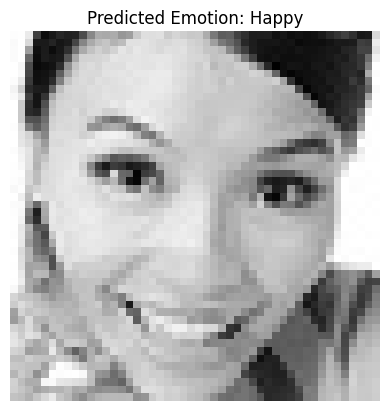

Predicted emotion: Happy


In [41]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def show_image_prediction(img_path, model):
    # Load image in grayscale and resize to 48x48
    img = image.load_img(img_path, target_size=(48,48), color_mode="grayscale")
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict emotion
    prediction = model.predict(img_array_expanded)
    classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = classes[np.argmax(prediction)]

    # Display image with title
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.axis('off')
    plt.show()

    return predicted_emotion

# Example usage:
predicted = show_image_prediction("happy_face.jpg", model)
print("Predicted emotion:", predicted)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


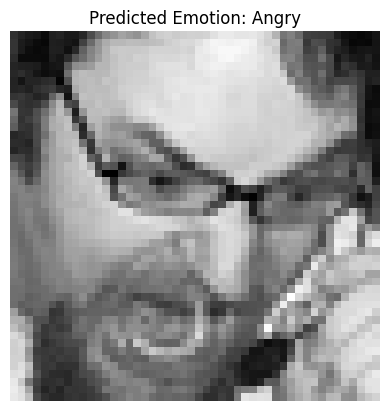

Predicted emotion: Angry


In [42]:
def show_image_prediction(img_path, model):
    # Load image in grayscale and resize to 48x48
    img = image.load_img(img_path, target_size=(48,48), color_mode="grayscale")
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict emotion
    prediction = model.predict(img_array_expanded)
    classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = classes[np.argmax(prediction)]

    # Display image with title
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.axis('off')
    plt.show()

    return predicted_emotion

# Example usage:
predicted = show_image_prediction("angry_face.jpg", model)
print("Predicted emotion:", predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


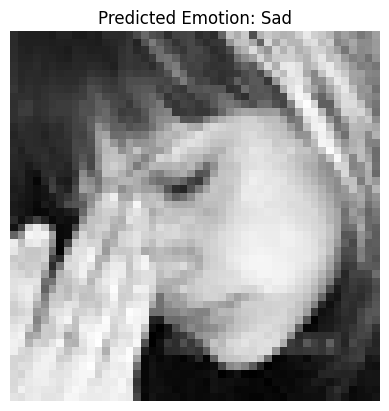

Predicted emotion: Sad


In [44]:
def show_image_prediction(img_path, model):
    # Load image in grayscale and resize to 48x48
    img = image.load_img(img_path, target_size=(48,48), color_mode="grayscale")
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict emotion
    prediction = model.predict(img_array_expanded)
    classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = classes[np.argmax(prediction)]

    # Display image with title
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.axis('off')
    plt.show()

    return predicted_emotion

# Example usage:
predicted = show_image_prediction("sad_face.jpg", model)
print("Predicted emotion:", predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


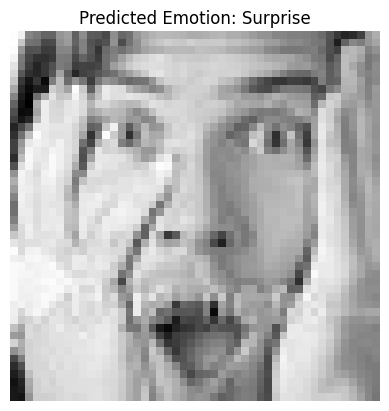

Predicted emotion: Surprise


In [45]:
def show_image_prediction(img_path, model):
    # Load image in grayscale and resize to 48x48
    img = image.load_img(img_path, target_size=(48,48), color_mode="grayscale")
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict emotion
    prediction = model.predict(img_array_expanded)
    classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = classes[np.argmax(prediction)]

    # Display image with title
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.axis('off')
    plt.show()

    return predicted_emotion

# Example usage:
predicted = show_image_prediction("surprise_face.jpg", model)
print("Predicted emotion:", predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


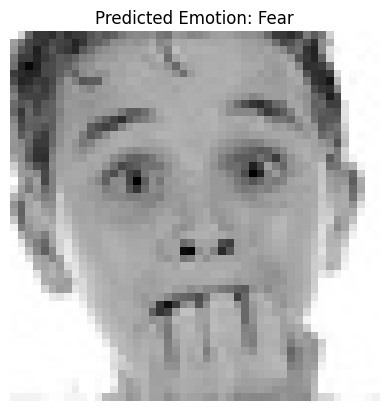

Predicted emotion: Fear


In [46]:
def show_image_prediction(img_path, model):
    # Load image in grayscale and resize to 48x48
    img = image.load_img(img_path, target_size=(48,48), color_mode="grayscale")
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict emotion
    prediction = model.predict(img_array_expanded)
    classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = classes[np.argmax(prediction)]

    # Display image with title
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.axis('off')
    plt.show()

    return predicted_emotion

# Example usage:
predicted = show_image_prediction("fear_face.jpg", model)
print("Predicted emotion:", predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


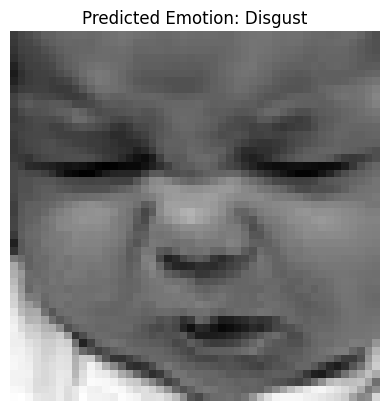

Predicted emotion: Disgust


In [47]:
def show_image_prediction(img_path, model):
    # Load image in grayscale and resize to 48x48
    img = image.load_img(img_path, target_size=(48,48), color_mode="grayscale")
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict emotion
    prediction = model.predict(img_array_expanded)
    classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = classes[np.argmax(prediction)]

    # Display image with title
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.axis('off')
    plt.show()

    return predicted_emotion

# Example usage:
predicted = show_image_prediction("disgust_face.jpg", model)
print("Predicted emotion:", predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


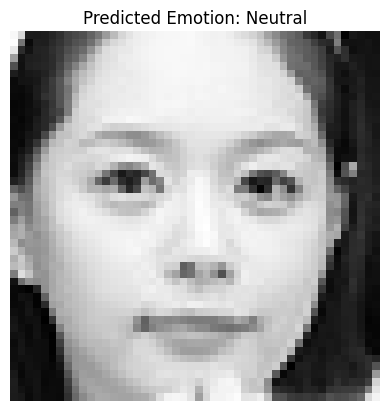

Predicted emotion: Neutral


In [48]:
def show_image_prediction(img_path, model):
    # Load image in grayscale and resize to 48x48
    img = image.load_img(img_path, target_size=(48,48), color_mode="grayscale")
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Predict emotion
    prediction = model.predict(img_array_expanded)
    classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    predicted_emotion = classes[np.argmax(prediction)]

    # Display image with title
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.title(f"Predicted Emotion: {predicted_emotion}")
    plt.axis('off')
    plt.show()

    return predicted_emotion

# Example usage:
predicted = show_image_prediction("neutral_face.jpg", model)
print("Predicted emotion:", predicted)